<a href="https://colab.research.google.com/github/Harshavardhan1005/Plant-Disease-Classification/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Imtroduction:

Now a days getting effected with the disease is very common for plant due to many reasons like environmental condition and various cultural practices. These effects the yield of the crop which eventually effect the economy of the farmers. So plant disease detection would be very helpfull for the framers by tracking the disesase before it is worse and effectively cultivate the crop.

Datset:

To start with the classification of plant disease, I had cam across with the dataset in Kaggle. The dataset contains 22,930 images of plant leaves.



Plant Disease Detection:

In this dataset there are 7 different types of plant disesases in tomato leaves.

In [ ]:
!nvidia-smi

Wed Jan 13 13:08:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
inception = InceptionV3(input_shape=(224,224,3),weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
inception.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_m

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(len(folders),activation = 'softmax')(x)

In [ ]:
model = Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
r = model.fit(training_set,
              validation_data=test_set,
              epochs=10,
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set))

Epoch 1/10
574/574 [==============================] - 308s 518ms/step - loss: 4.2017 - accuracy: 0.5828 - val_loss: 3.1796 - val_accuracy: 0.6971
Epoch 2/10
574/574 [==============================] - 297s 517ms/step - loss: 2.0076 - accuracy: 0.7844 - val_loss: 2.0541 - val_accuracy: 0.8085
Epoch 3/10
574/574 [==============================] - 300s 523ms/step - loss: 2.0581 - accuracy: 0.8150 - val_loss: 2.0440 - val_accuracy: 0.8262
Epoch 4/10
574/574 [==============================] - 306s 532ms/step - loss: 1.8595 - accuracy: 0.8446 - val_loss: 3.0085 - val_accuracy: 0.7991
Epoch 5/10
574/574 [==============================] - 300s 522ms/step - loss: 1.9718 - accuracy: 0.8465 - val_loss: 2.0647 - val_accuracy: 0.8482
Epoch 6/10
574/574 [==============================] - 298s 518ms/step - loss: 1.7686 - accuracy: 0.8681 - val_loss: 2.1072 - val_accuracy: 0.8543
Epoch 7/10
574/574 [==============================] - 302s 526ms/step - loss: 1.8982 - accuracy: 0.8682 - val_loss: 1.8758 -

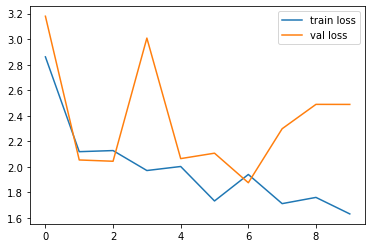

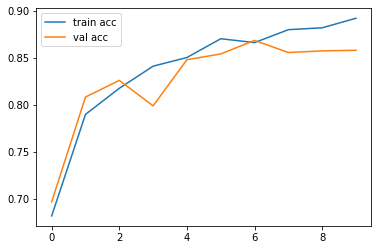

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('plant_disease_detection_inceptionv3.h5')

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Plant Disease/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
pred = model.predict(test_set)

In [ ]:
pred = np.argmax(pred,axis=1)

In [ ]:
print(accuracy_score(pred,test_set.labels))

0.8582333696837514


In [ ]:
print(classification_report(pred,test_set.labels))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       424
           1       0.80      0.83      0.81       461
           2       0.94      0.70      0.80       627
           3       0.84      0.88      0.86       453
           4       0.81      0.83      0.82       426
           5       0.87      0.86      0.86       438
           6       0.60      0.93      0.73       296
           7       0.95      0.96      0.96       483
           8       0.98      0.82      0.90       536
           9       0.89      0.97      0.92       441

    accuracy                           0.86      4585
   macro avg       0.86      0.87      0.86      4585
weighted avg       0.87      0.86      0.86      4585



In [ ]:
print(confusion_matrix(pred,test_set.labels))

[[383   8   1   0  13   2  12   5   0   0]
 [  7 382   7   3  17   5  38   0   0   2]
 [  9  47 437  31  27  13  36   2   3  22]
 [  1   8   8 397  16   6   8   3   2   4]
 [ 18  18   3   3 352   4  24   1   1   2]
 [  1   6   2   5   1 377  35   4   0   7]
 [  1   3   2   0   3   6 274   0   0   7]
 [  3   1   1   2   0   6   1 466   1   2]
 [  2   7   1  27   7  16  17   9 441   9]
 [  0   0   1   2   0   0  12   0   0 426]]
